In [2]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
#import scipy.special as sp

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    location = 'E:\\Documents\\Dan\\Code\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'


#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)


Bad key "axes.titlelocation" on line 358 in
Prospectus.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import mpu6050 as mp
import time

In [20]:
sensor = mp.mpu6050(0x68)
Results = []

In [21]:
for i in range(1250):
    gx, gy, gz = sensor.get_accel_data(True)
    tx, ty, tz = sensor.get_gyro_data()
    Results.append([time.time(), gx, gy, gz, tx, ty, tz])
    time.sleep(0.01)

Results = np.matrix(Results)

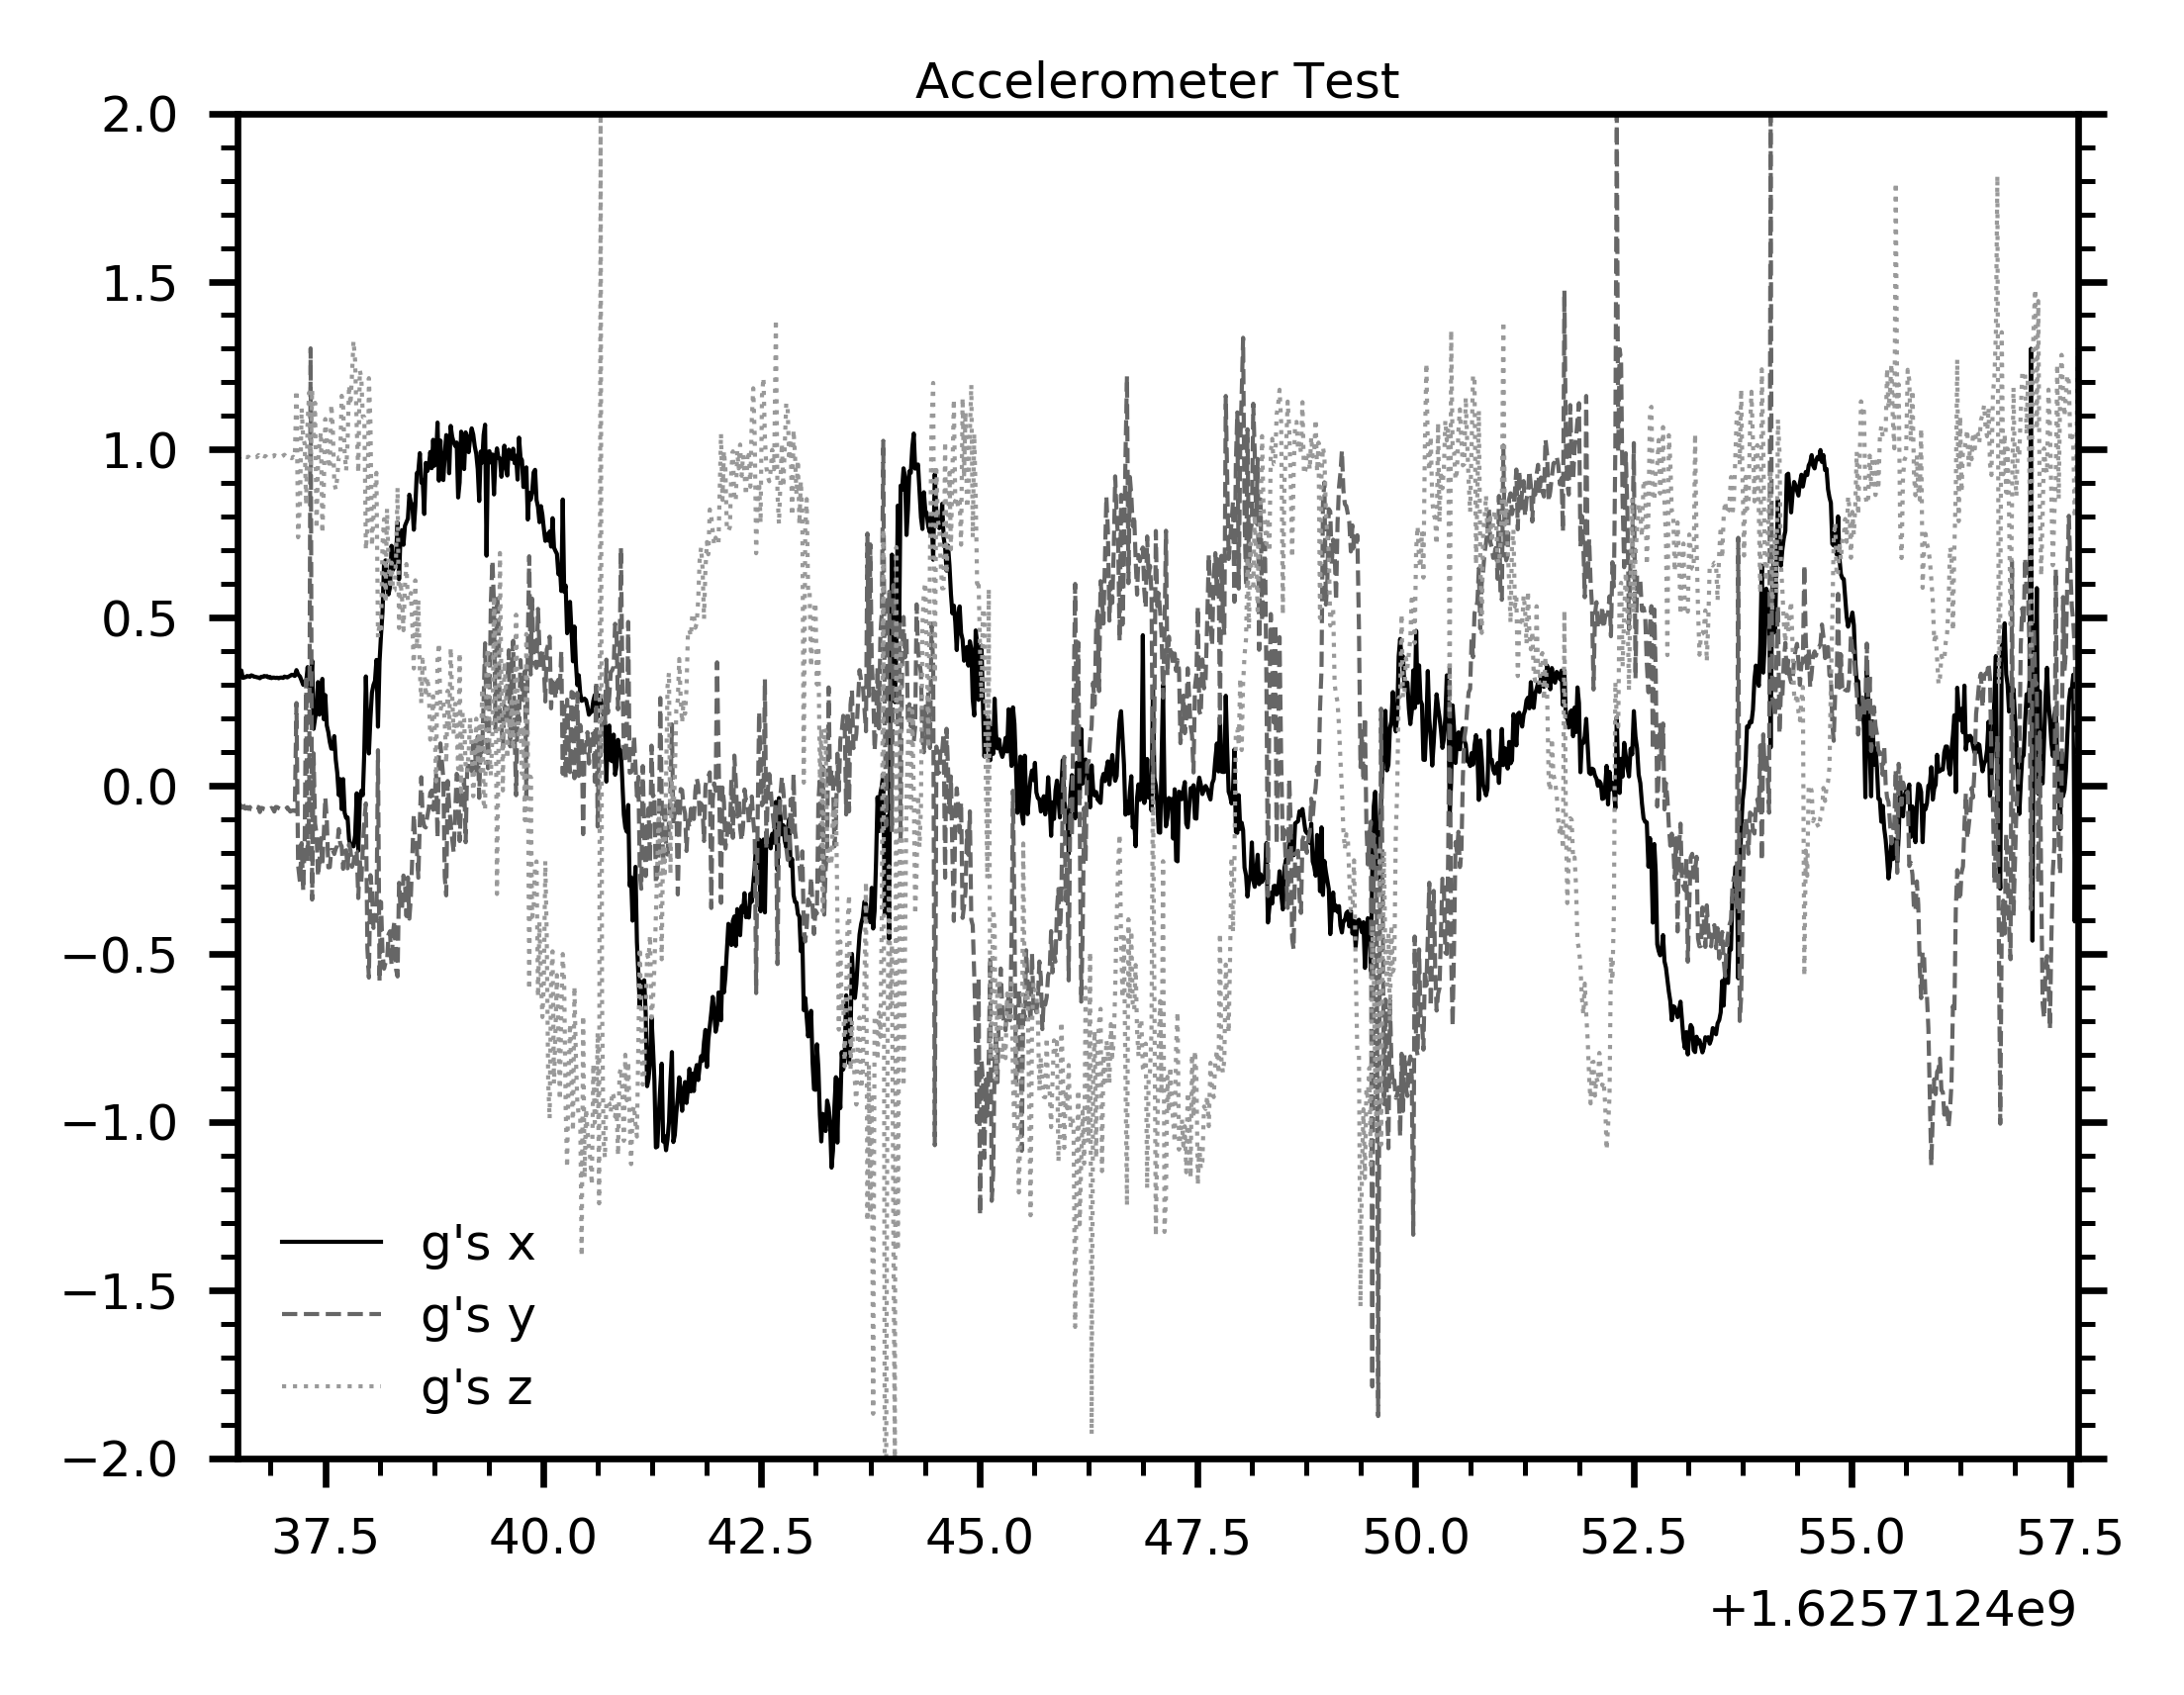

In [22]:
fig = plt.figure()
plt.plot(Results[:,0],Results[:,1],label="g's x")
plt.plot(Results[:,0],Results[:,2],label="g's y")
plt.plot(Results[:,0],Results[:,3],label="g's z")
title = 'Accelerometer Test'

if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ","")+FFormat)
plt.show()